In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [3]:
data_src = "../data/preprocessed/solar_data_combined_cleaned.csv"
data_df = pd.read_csv(data_src, index_col = 0)

count    135556.000000
mean        440.250701
std         273.428151
min           3.000000
25%         202.000000
50%         417.000000
75%         658.000000
max         999.000000
Name: GHI, dtype: float64
Kurtosis of normal distribution (should be 0): -1.0491679937423866
Skewness of normal distribution (should be 0): 0.26090510909475306


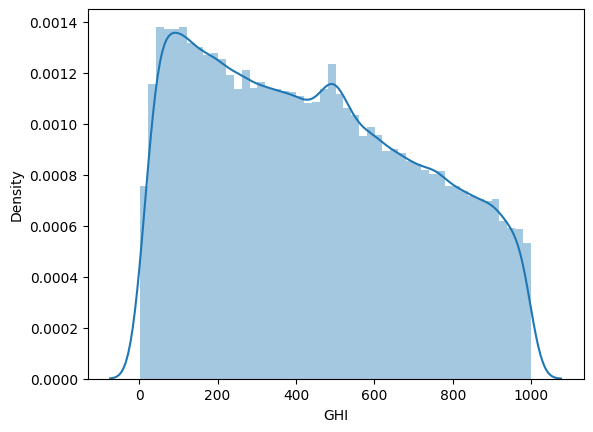

In [5]:
print(data_df.GHI.describe())

sns.distplot(data_df.GHI);

stats.normaltest(data_df.GHI)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data_df.GHI)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data_df.GHI)))

In [17]:
df_time_ghi = data_df.loc[:,['local_datetime','GHI']]
df_time_ghi.set_index('local_datetime',inplace=True);

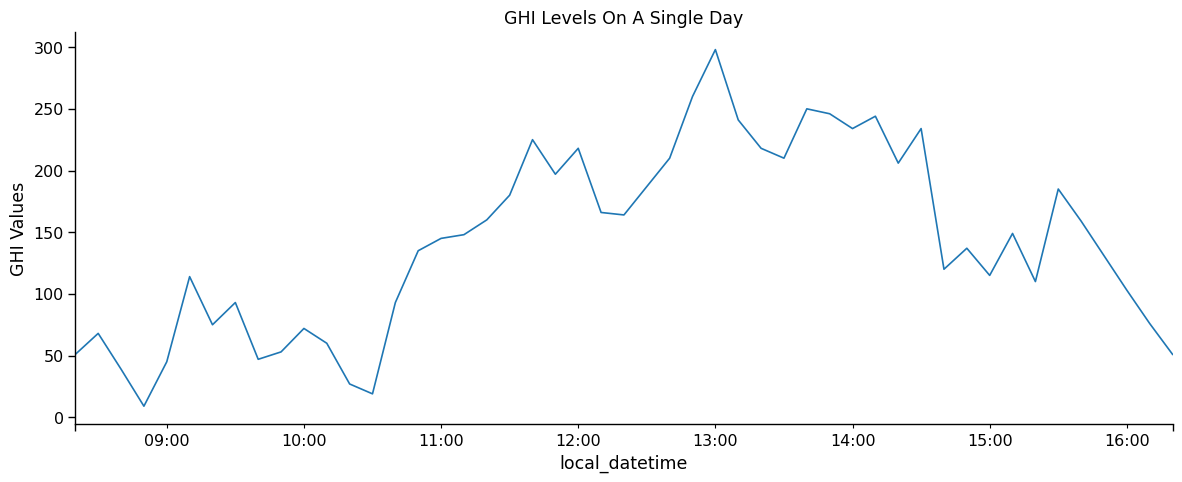

In [49]:
temp_ghi_start = '2022-01-01 00:00:00'
temp_ghi_end = '2022-01-01 23:59:59'
df_day = df_time_ghi[(df_time_ghi.index >= temp_ghi_start ) & (df_time_ghi.index < temp_ghi_end)]  

df_day.plot(figsize=(12,5));
plt.title('GHI Levels On A Single Day')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

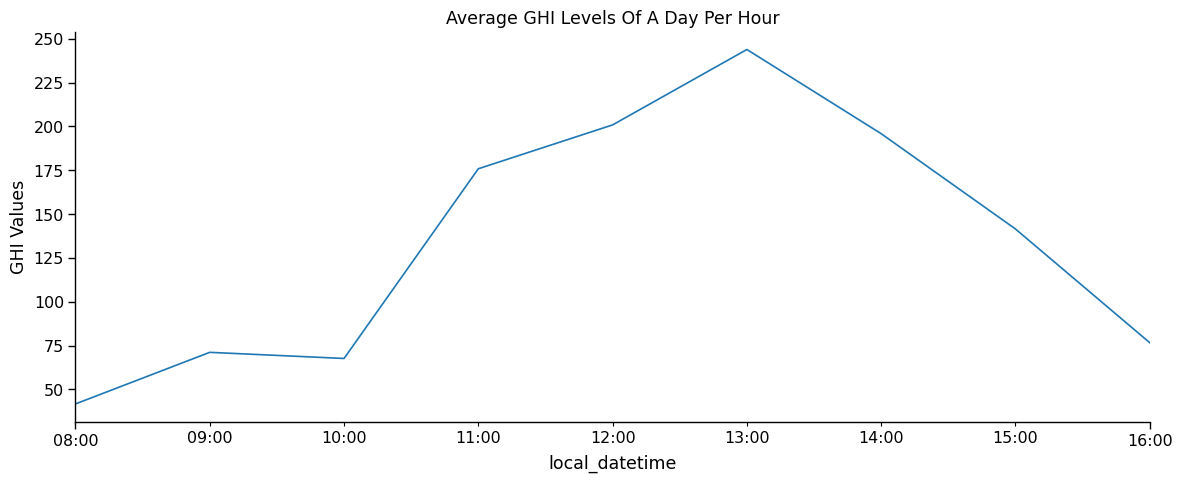

In [50]:
df_day.index = pd.to_datetime(df_day.index)
df_day = df_day.resample('H').mean()
df_day.plot(figsize=(12,5));
plt.title('Average GHI Levels Of A Day Per Hour')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

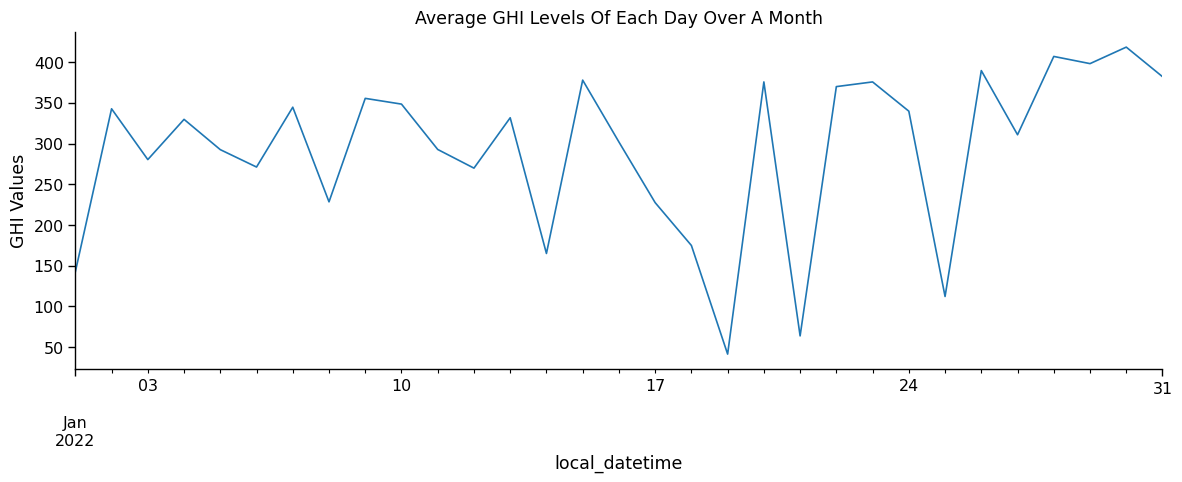

In [51]:
temp_ghi_start = '2022-01-01 00:00:00'
temp_ghi_end = '2022-01-31 23:59:59'

df_month = df_time_ghi[temp_ghi_start:temp_ghi_end]
df_month.index = pd.to_datetime(df_month.index)
df_month = df_month.resample('D').mean()

df_month.plot(figsize=(12,5));
plt.title('Average GHI Levels Of Each Day Over A Month')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

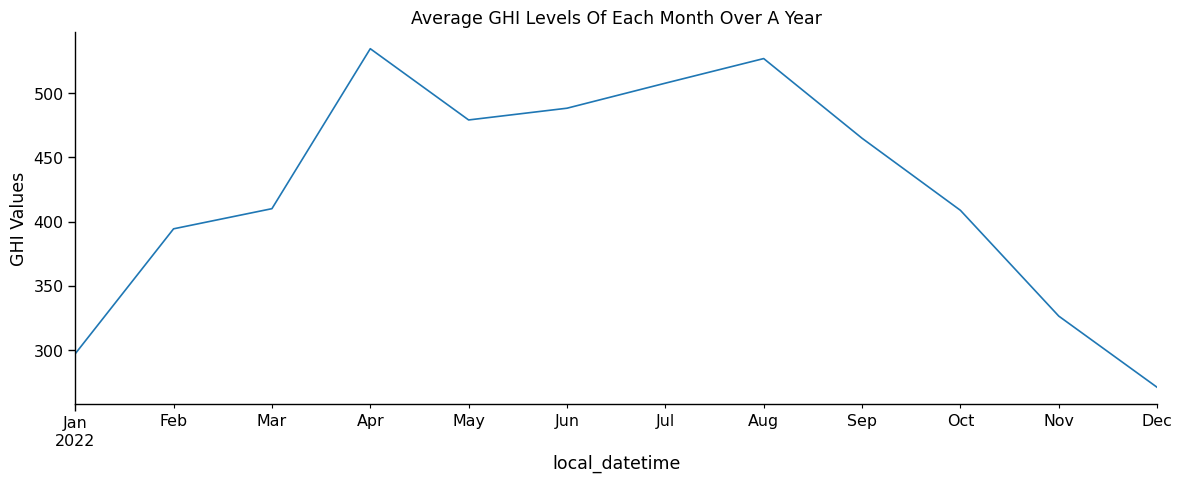

In [52]:
temp_ghi_start = '2022-01-01 00:00:00'
temp_ghi_end = '2022-12-31 23:59:59'

df_Year = df_time_ghi[temp_ghi_start:temp_ghi_end]
df_Year.index = pd.to_datetime(df_Year.index)
df_Year = df_Year.resample('M').mean()

df_Year.plot(figsize=(12,5));
plt.title('Average GHI Levels Of Each Month Over A Year')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

                       GHI
local_datetime            
2018-12-31      442.897167
2019-12-31      447.777556
2020-12-31      450.541604
2021-12-31      435.556442
2022-12-31      437.955320
2023-12-31      428.152037


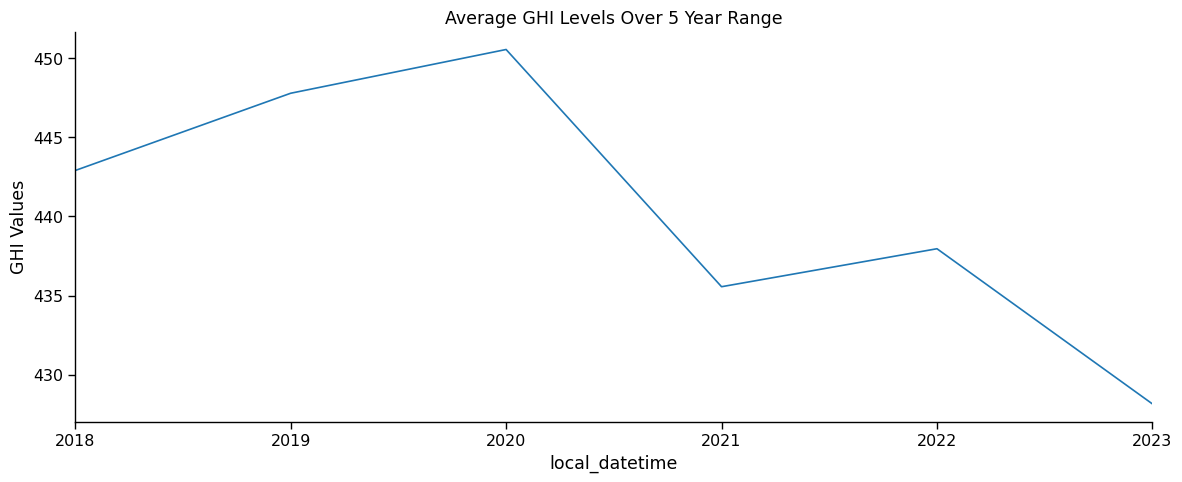

In [53]:
df_YearRange = df_time_ghi
df_YearRange.index = pd.to_datetime(df_YearRange.index)
df_YearRange = df_YearRange.resample('Y').mean()

df_YearRange.plot(figsize=(12,5));
plt.title('Average GHI Levels Over 5 Year Range')
plt.ylabel('GHI Values')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show()

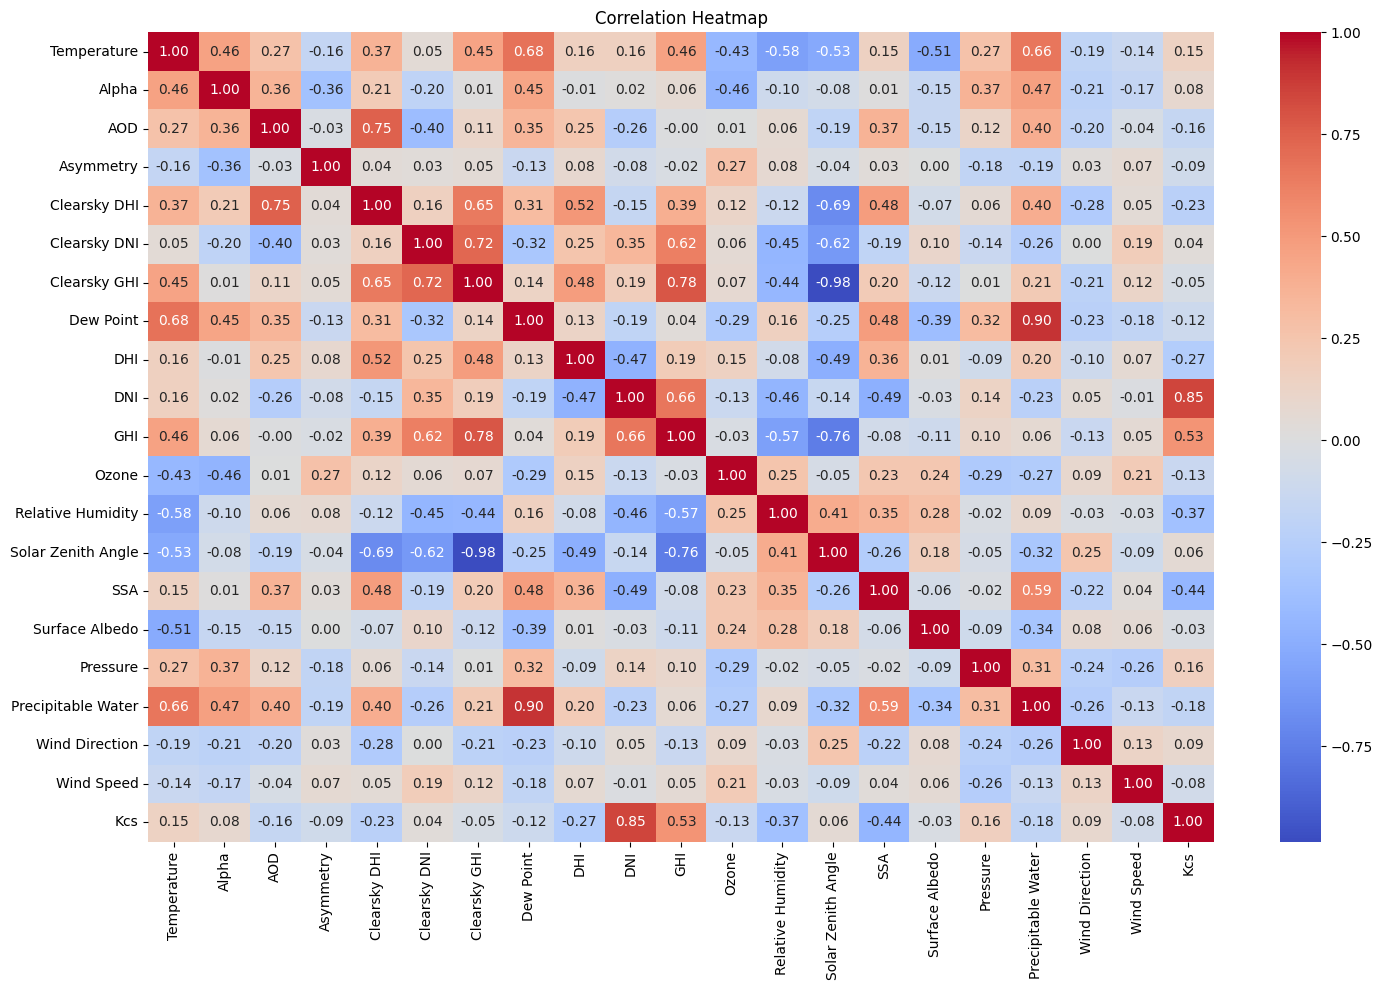

In [27]:
# Drop datetime columns by name
df_no_datetime = data_df.drop(columns=['local_datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute'])
plt.figure(figsize=(15, 10))
sns.heatmap(df_no_datetime.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'GHI Distribution')

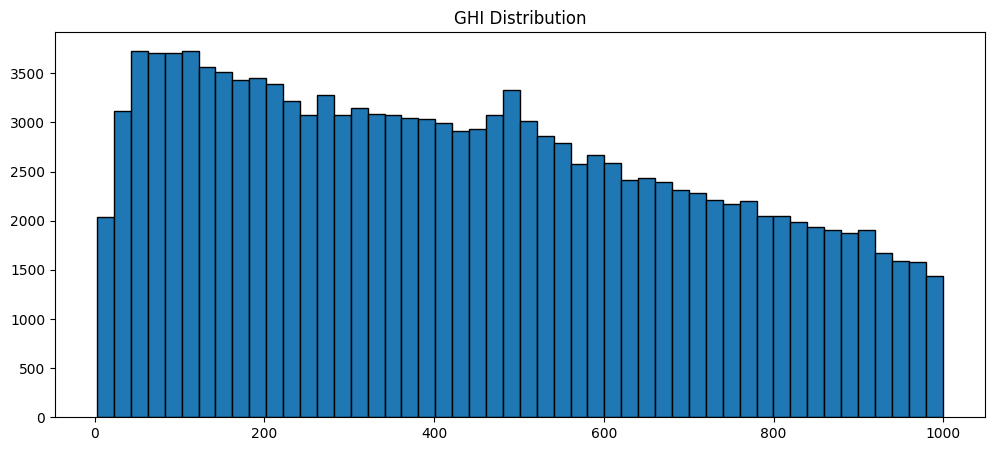

In [28]:
plt.figure(figsize=(12, 5))
data_df['GHI'].hist(bins=50, edgecolor='black', grid=False)
plt.title('GHI Distribution')

In [30]:
load = data_df['GHI'].quantile(0.97)
df_load = data_df[data_df['GHI'] < load]

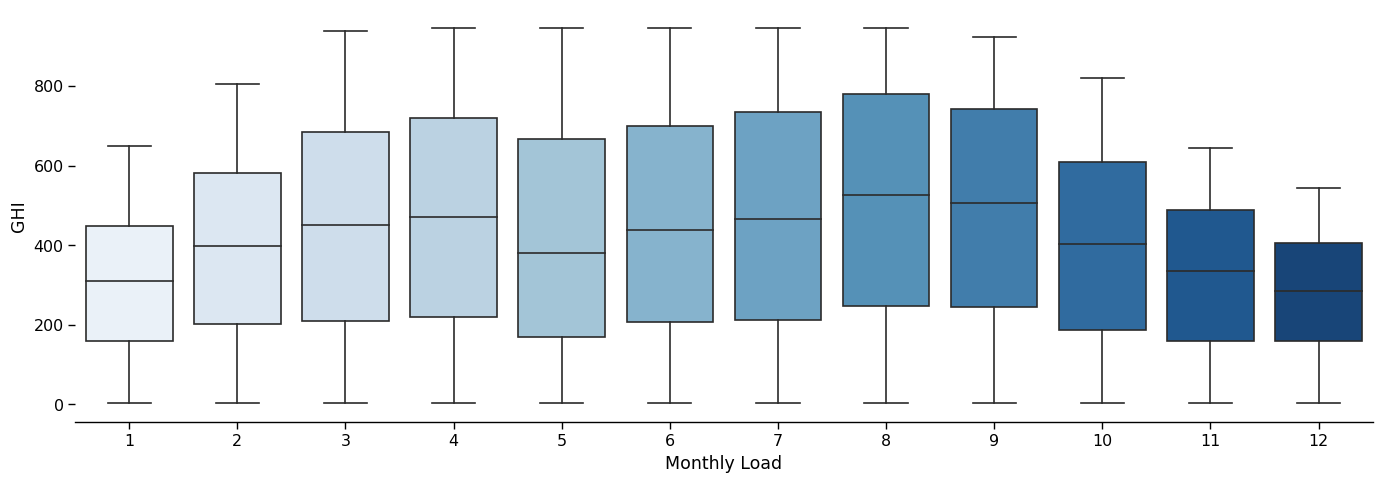

In [32]:
sns.set_context("paper", font_scale=1.3)  
a=plt.figure(figsize=(14,5))
sns.boxplot(x="Month", y="GHI", data=df_load, palette='Blues');
plt.xlabel('Monthly Load')
sns.despine(left=True);
plt.tight_layout() 

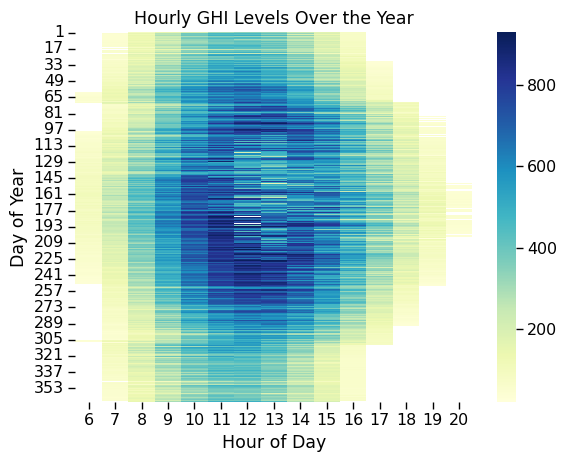

In [54]:
df_load['local_datetime'] = pd.to_datetime(df_load['local_datetime'])
df_load['DayOfYear'] = df_load['local_datetime'].dt.dayofyear
df_load['Hour'] = df_load['local_datetime'].dt.hour
pivot_table = df_load.pivot_table(index='DayOfYear', columns='Hour', values='GHI', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', cbar=True)
plt.title('Hourly GHI Levels Over the Year')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Year')
plt.show()

In [46]:
def assign_season(month):
    seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
               3: 'Spring', 4: 'Spring', 5: 'Spring',
               6: 'Summer', 7: 'Summer', 8: 'Summer',
               9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
    return seasons.get(month, 'Unknown')  # Handles unexpected values


# Add a 'Season' column
df_load['Season'] = df_load['local_datetime'].dt.month.apply(assign_season)

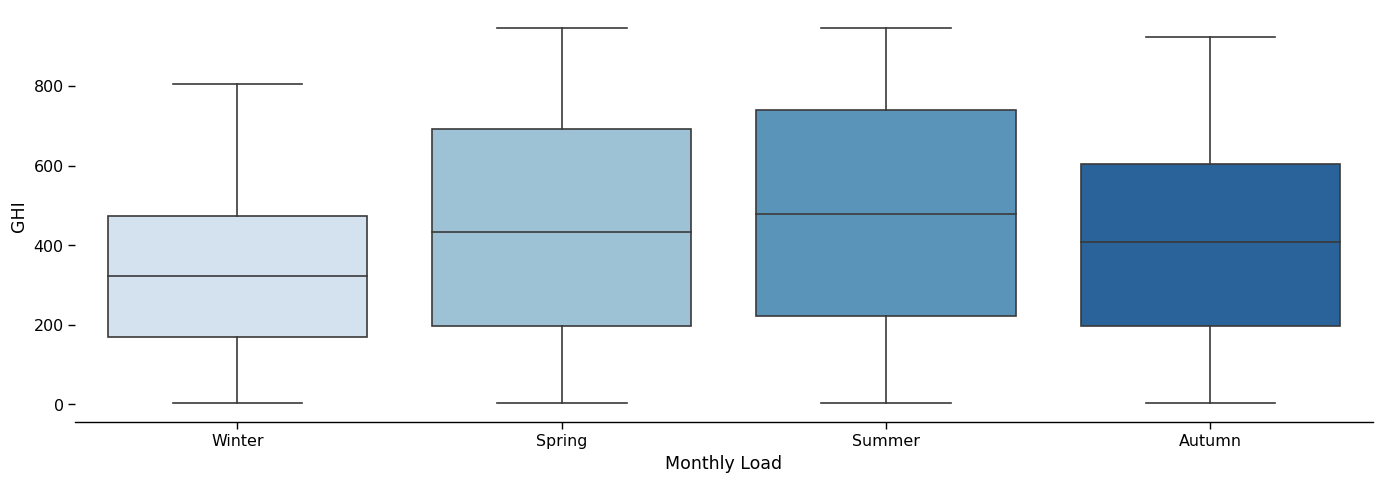

In [47]:
sns.set_context("paper", font_scale=1.3)  
a=plt.figure(figsize=(14,5))
sns.boxplot(x="Season", y="GHI", data=df_load, palette='Blues');
plt.xlabel('Monthly Load')
sns.despine(left=True);
plt.tight_layout() 